#  Information Retrieval & Data Mining

## Assigment topic Inflation

<M.Hüseyin Demirkapı>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import requests as req

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.graph_objects as g
from plotly.subplots import make_subplots as sp


In [2]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [3]:
ctList = []
ctList.append(['Turkey'])
ctList.append(['Germany'])
ctList.append(['China'])
ctList.append(['Ireland'])

countryList = []
country = pd.DataFrame(columns=["Year", "InflationRate", "EU", "USA", "World"])

for detail in ctList:
        url=f"https://www.worlddata.info/europe/{detail}/inflation-rates.php"
        #Save the text of the response
        request = req.get(url)
        #Parse the html data using beautiful_soup.
        infSoup = BeautifulSoup(request.content, "html.parser")
        table = infSoup.find_all("table",{"class":"std100 hover"})
        rows = infSoup.find_all('tr') # To print out table rows only
        list_rows = []               #We will add all rows information at this list_rows
        for row in rows:
            #print(row)
            data = row.find_all('td')
            row_data = [td.text.strip() for td in data]
            #print(data)
            str_cells = str(row_data) #each row is printed with html tags embedded in each row
            cleantext = BeautifulSoup(str_cells, "lxml").get_text() #to remove html tags using Beautiful Soup
            #print(cleantext)
            
            str_cells = str(data)
            import re
            clean = re.compile('<.*?>')   
            clean2 = (re.sub(clean, '',str_cells)) #finds all the characters inside the
            clean3 = (re.sub(r'\r\n', '',clean2))  #< td > html tags and replace them with an empty string for each table row
            list_rows.append(clean3)
        #print(list_rows)
        df = pd.DataFrame(list_rows) # convert the list into a dataframe for each country
        #print(df)                                #starting to cleaning
        df1 = df[0].str.split(',', expand = True) # we should split the "0" column into multiple columns at the comma position
        #print(df1)                               
        col_labels = infSoup.find_all('th')  #missing table headers

        all_header = []
        col_str = str(col_labels)           #extract text in between html tags for table headers.
        cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
        all_header.append(cleantext2)
        #print(all_header)

        df2 = pd.DataFrame(all_header)   #convert the list of headers into a pandas dataframe.
        df3 = df2[0].str.split(',', expand=True)
        frames = [df3, df1]
        df4 = pd.concat(frames)         #The two dataframes can be concatenated into one
        #print(df4)
        df5 = df4.rename(columns=df4.iloc[0]) #assign the first row to be the table header.
        #print(df5)
        
        df6 = df5.dropna(axis=0, how='any') #drop all rows with any missing values.
        df7 = df6.drop(df6.index[0])        # dropp the first row
        #df7.pop(' Ø USA')
        #print(df7)
        df7.columns = ["Year" , f"{detail}" , "EU" ,"USA", "WORLD"] # rename of all columns
        
        df7.columns = df7.columns.str.strip("['")    #delete some character in columns and rows
        df7.columns = df7.columns.str.strip("']")
        #print(df7)
        df7['WORLD'] = df7['WORLD'].str.strip(']')
        df7['Year'] = df7['Year'].str.strip('[',)
        df7.drop(df7[(df7['WORLD'] ==' n/a')].index, inplace=True)
        #print(df7) 
        df7[df7.columns.values[1]] = df7[df7.columns.values[1]].str.strip(' %')
        df7['EU'] = df7['EU'].str.strip(' %')
        df7['USA'] = df7['USA'].str.strip(' %')
        df7['WORLD'] = df7['WORLD'].str.strip(' %')
        #print(df7)
        df7.to_csv(df7.columns.values[1] + '_Data.csv', index = True)  # save tha data which we organized and cleaned
        
        df7['Year'] = df7['Year'].astype('int')      # change all data format with separately
        df7[df7.columns.values[1]] = df7[df7.columns.values[1]].astype('float')
        df7['EU'] = df7['EU'].astype('float')
        df7['USA'] = df7['USA'].astype('float')
        df7['WORLD'] = df7['WORLD'].astype('float')
        #df7.dtypes
        
        
        countryList.append(df7); # add all data with separately



print(countryList)

[    Year  Turkey     EU    USA  WORLD
1   2021   19.60   2.55   4.70   3.42
2   2020   12.28   0.50   1.23   1.92
3   2019   15.18   1.63   1.81   2.19
4   2018   16.33   1.74   2.44   2.44
5   2017   11.14   1.43   2.13   2.19
6   2016    7.78   0.18   1.26   1.55
7   2015    7.67  -0.06   0.12   1.43
8   2014    8.85   0.20   1.62   2.35
9   2013    7.49   1.22   1.46   2.62
10  2012    8.89   2.66   2.07   3.73
11  2011    6.47   3.29   3.16   4.82
12  2010    8.57   1.53   1.64   3.35
13  2009    6.25   0.84  -0.36   2.94
14  2008   10.44   4.16   3.84   8.95
15  2007    8.76   2.51   2.85   4.82
16  2006    9.60   2.67   3.23   4.28
17  2005    8.18   2.49   3.39   4.11
18  2004    8.60   2.29   2.68   3.38
19  2003   21.60   2.09   2.27   3.03
20  2002   44.96   2.42   1.59   2.83
21  2001   54.40   3.37   2.83   3.84
22  2000   54.92   3.15   3.38   3.49
23  1999   64.87   2.16   2.19   3.08
24  1998   84.64   2.42   1.55   5.11
25  1997   85.67   3.11   2.34   5.57
26  1996   

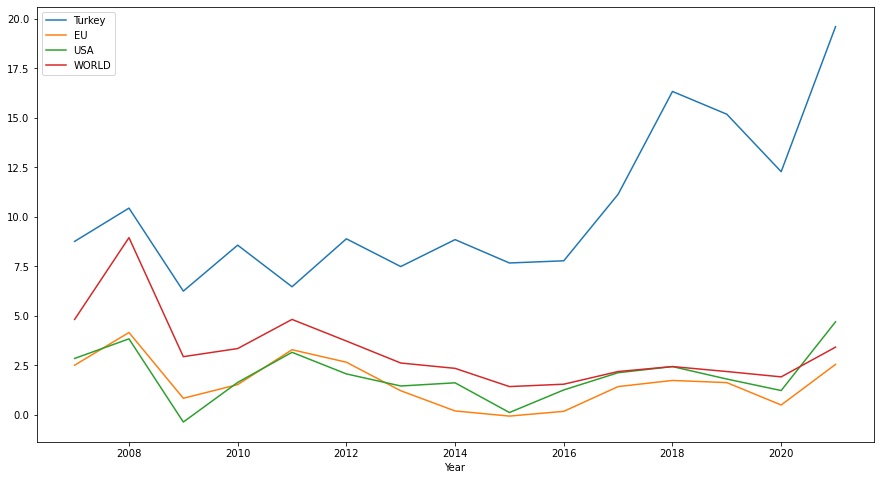

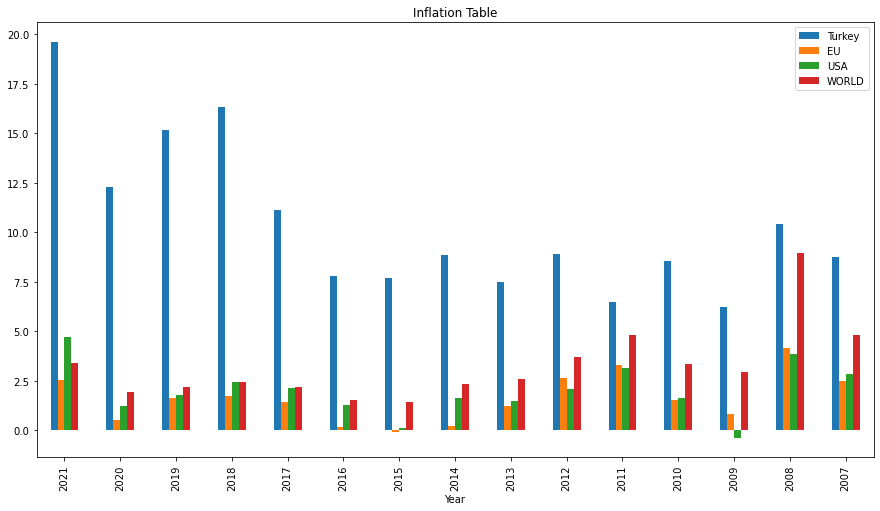

In [4]:
Tdf = pd.read_csv('Turkey_data.csv')     # read data from your file 

#Now we can start plotting the data and computing interesting statistics.

Tdf.head(15).plot(x="Year", y=[ "Turkey", "EU","USA", "WORLD"] , kind='line' , figsize=(15,8))
Tdf.head(15).plot(x="Year", y=[ "Turkey", "EU","USA", "WORLD"] ,title='Inflation Table',kind='bar', figsize=(15,8))
plt.show()


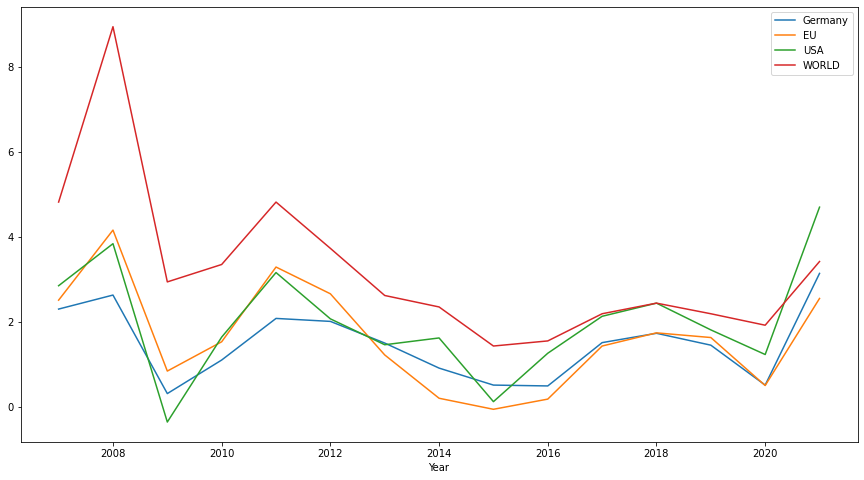

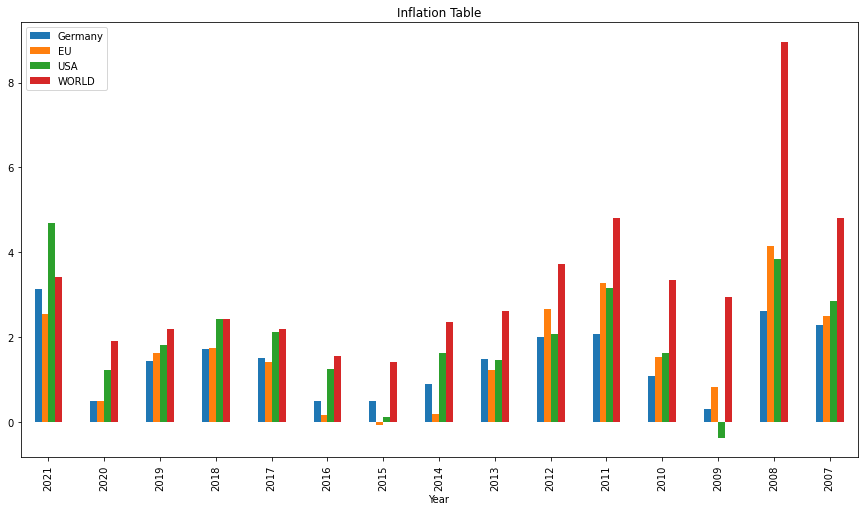

In [5]:
Gdf = pd.read_csv('Germany_data.csv')

Gdf.head(15).plot(x="Year", y=[ "Germany", "EU","USA", "WORLD"] , kind='line' , figsize=(15,8))
Gdf.head(15).plot(x="Year", y=[ "Germany", "EU","USA", "WORLD"] ,title='Inflation Table',kind='bar', figsize=(15,8))

plt.show()

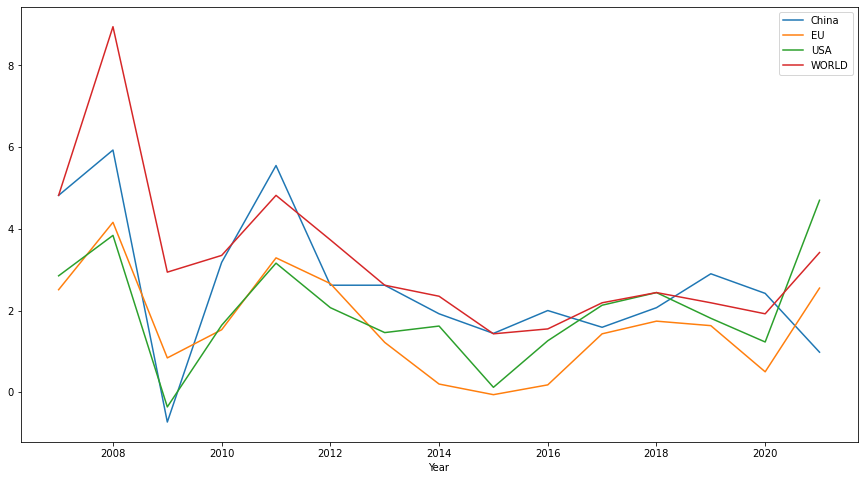

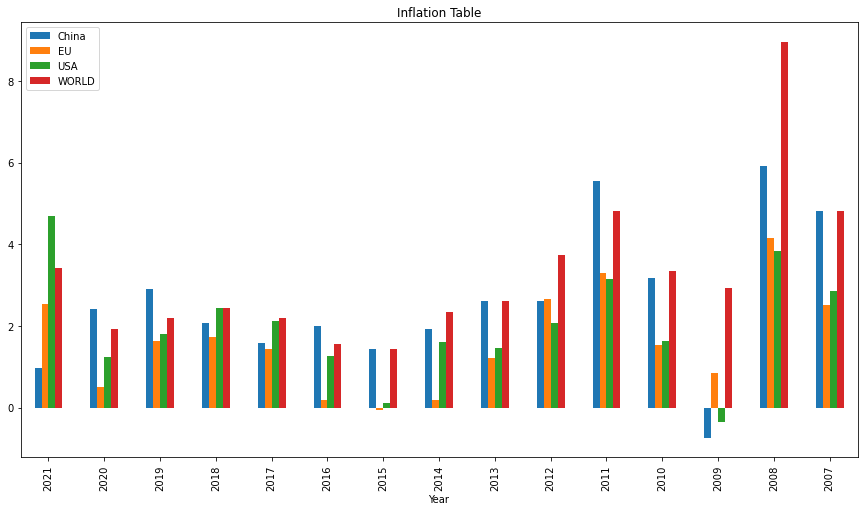

In [6]:
Cdf = pd.read_csv('China_data.csv')

Cdf.head(15).plot(x="Year", y=[ "China", "EU","USA", "WORLD"] , kind='line' , figsize=(15,8))
Cdf.head(15).plot(x="Year", y=[ "China", "EU","USA", "WORLD"] ,title='Inflation Table',kind='bar', figsize=(15,8))

plt.show()

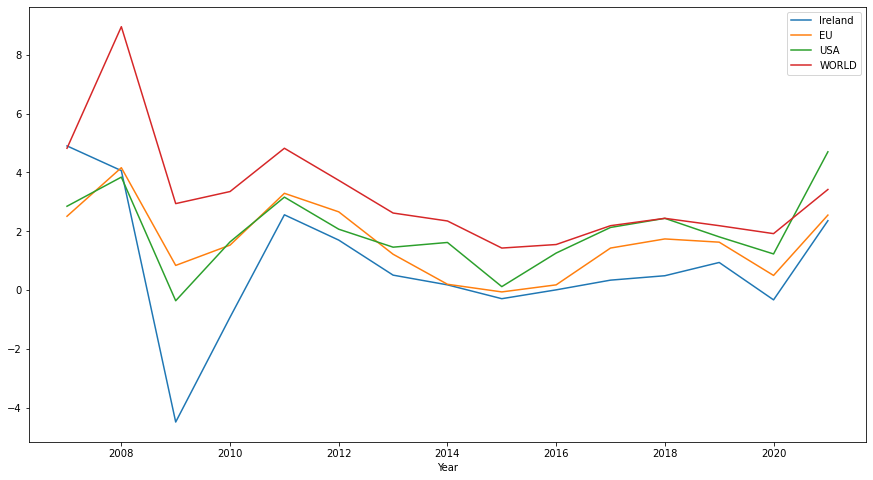

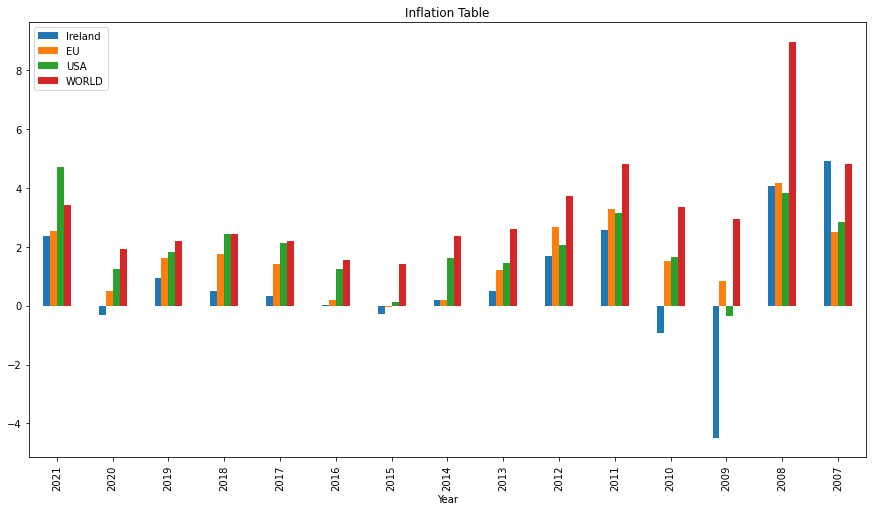

In [7]:
Idf = pd.read_csv('Ireland_data.csv')

Idf.head(15).plot(x="Year", y=[ "Ireland", "EU","USA", "WORLD"] , kind='line' , figsize=(15,8))

Idf.head(15).plot(x="Year", y=[ "Ireland", "EU","USA", "WORLD"] ,title='Inflation Table',kind='bar', figsize=(15,8))
plt.show()


In [8]:
dataFrameList = []

Tdf = pd.read_csv('Turkey_data.csv')
Gdf = pd.read_csv('Germany_data.csv')
Cdf = pd.read_csv('China_data.csv')
Idf = pd.read_csv('Ireland_data.csv')

dataFrameList.append(Gdf)
dataFrameList.append(Tdf)
dataFrameList.append(Cdf)
dataFrameList.append(Idf)

